In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from keras import models,layers

In [2]:
import glob

In [111]:
train_build_list=[]
for filename in glob.glob('C:/Users/rajat/Desktop/rob/robin/image classificatoin/seg_train/buildings/*.jpg'):
    im=Image.open(filename)
    train_build_list.append(im)

In [11]:
np.array(train_build_list[0].getdata()).shape

(22500, 3)

In [112]:
build_array=[]
for i in train_build_list:
    build_array.append(np.array(i.getdata()))

In [113]:
to_remove=[]
for i in range(len(build_array)):
    if(build_array[i].shape[0]==150 or build_array[i].shape[0]==22500):
        build_array[i]=build_array[i].reshape((150,150,3))
    else:
        to_remove.append(i)

In [114]:
x=0
for i in to_remove:
    build_array.pop(i)
    x+=1

In [115]:
from collections import Counter
c=Counter()
for i in build_array:
    c.update(i.shape)

In [116]:
c

Counter({150: 4380, 3: 2190})

In [117]:
for i in train_build_list:
    i.close()

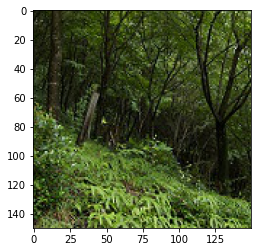

In [118]:
train_forest_list=[]
for filename in glob.glob('C:/Users/rajat/Desktop/rob/robin/image classificatoin/seg_train/forest/*.jpg'):
    im=Image.open(filename)
    train_forest_list.append(im)

In [119]:
forest_array=[]
for i in train_forest_list:
    forest_array.append(np.array(i.getdata()))    

to_remove=[]
for i in range(len(forest_array)):
    if(forest_array[i].shape[0]==150 or forest_array[i].shape[0]==22500):
        forest_array[i]=forest_array[i].reshape((150,150,3))
    else:
        to_remove.append(i)

In [122]:
c=Counter()
for i in forest_array:
    c.update(i.shape)
c

Counter({150: 4526, 3: 2263})

In [121]:
x=0
for i in to_remove:
    forest_array.pop(i-x)
    x+=1

In [123]:
for i in train_forest_list:
    i.close()

In [124]:
del train_glacier_list

In [125]:
train_glacier_list=[]
for filename in glob.glob('C:/Users/rajat/Desktop/rob/robin/image classificatoin/seg_train/glacier/*.jpg'):
    im=Image.open(filename)
    train_glacier_list.append(im)

In [126]:
glacier_array=[]
for i in train_glacier_list:
    glacier_array.append(np.array(i.getdata()))    

to_remove=[]
for i in range(len(glacier_array)):
    if(glacier_array[i].shape[0]==150 or glacier_array[i].shape[0]==22500):
        glacier_array[i]=glacier_array[i].reshape((150,150,3))
    else:
        to_remove.append(i)


In [129]:
c=Counter()
for i in glacier_array:
    c.update(i.shape)
c

Counter({150: 4774, 3: 2387})

In [128]:
x=0
for i in to_remove:
    glacier_array.pop(i-x)
    x+=1

In [130]:
for i in train_glacier_list:
    i.close()

In [42]:
for i in train_mountain_list:
    i.close()

In [131]:
del train_mountain_list

In [132]:
train_mountain_list=[]
for filename in glob.glob('C:/Users/rajat/Desktop/rob/robin/image classificatoin/seg_train/mountain/*.jpg'):
    im=Image.open(filename)
    train_mountain_list.append(im)

In [133]:
mountain_array=[]
for i in train_mountain_list:
    mountain_array.append(np.array(i.getdata()))      

to_remove=[]
for i in range(len(mountain_array)):
    if(mountain_array[i].shape[0]==150 or mountain_array[i].shape[0]==22500):
        mountain_array[i]=mountain_array[i].reshape((150,150,3))
    else:
        to_remove.append(i)

In [137]:
c=Counter()
for i in mountain_array:
    c.update(i.shape)
c

Counter({150: 4990, 3: 2495})

In [136]:
x=0
for i in to_remove:
    mountain_array.pop(i-x)
    x+=1

In [138]:
for i in train_mountain_list:
    i.close()

In [139]:
train_street_list=[]
for filename in glob.glob('C:/Users/rajat/Desktop/rob/robin/image classificatoin/seg_train/street/*.jpg'):
    im=Image.open(filename)
    train_street_list.append(im)

In [140]:
street_array=[]
for i in train_street_list:
    street_array.append(np.array(i.getdata()))    

to_remove=[]
for i in range(len(street_array)):
    if(street_array[i].shape[0]==150 or street_array[i].shape[0]==22500):
        street_array[i]=street_array[i].reshape((150,150,3))
    else:
        to_remove.append(i)

In [143]:
c=Counter()
for i in street_array:
    c.update(i.shape)
c

Counter({150: 4762, 3: 2381})

In [142]:
x=0
for i in to_remove:
    street_array.pop(i-x)
    x+=1

In [144]:
for i in train_street_list:
    i.close()

In [145]:
train_sea_list=[]
for filename in glob.glob('C:/Users/rajat/Desktop/rob/robin/image classificatoin/seg_train/sea/*.jpg'):
    im=Image.open(filename)
    train_sea_list.append(im)

In [146]:
sea_array=[]
for i in train_sea_list:
    sea_array.append(np.array(i.getdata()))    

to_remove=[]
for i in range(len(sea_array)):
    if(sea_array[i].shape[0]==150 or sea_array[i].shape[0]==22500):
        sea_array[i]=sea_array[i].reshape((150,150,3))
    else:
        to_remove.append(i)

In [150]:
c=Counter()
for i in sea_array:
    c.update(i.shape)
c

Counter({150: 4540, 3: 2270})

In [149]:
x=0
for i in to_remove:
    sea_array.pop(i-x)
    x+=1

In [151]:
for i in train_sea_list:
    i.close()

In [210]:
result={0:'building',1:'forest',2:'glacier',3:'mountain',4:'street',5:'sea'}

In [164]:
building_label=[0 for i in range(len(build_array))]
forest_label=[1 for i in range(len(forest_array))]
glacier_label=[2 for i in range(len(glacier_array))]
mountain_label=[3 for i in range(len(mountain_array))]
street_label=[4 for i in range(len(street_array))]
sea_label=[5 for i in range(len(sea_array))]


In [171]:
train_image=[]
train_image.extend(build_array)

In [174]:
train_image.extend(forest_array)
train_image.extend(glacier_array)
train_image.extend(mountain_array)
train_image.extend(street_array)
train_image.extend(sea_array)

In [186]:
train_array=np.array(train_image)

In [180]:
train_label=[]
train_label.extend(building_label)
train_label.extend(forest_label)
train_label.extend(glacier_label)
train_label.extend(mountain_label)
train_label.extend(street_label)
train_label.extend(sea_label)

In [187]:
train_array.shape

(13986, 150, 150, 3)

In [189]:
train_label=np.array(train_label)

In [190]:
train_label.shape

(13986,)

In [188]:
train_array=train_array/255.0

In [182]:
model=keras.Sequential()
model.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))

In [183]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(6,activation='softmax'))

In [191]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
model.fit(train_array,train_label,epochs=3)

Epoch 1/3


C:\Users\rajat\anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:4929: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


438/438 [==============================] - 709s 2s/step - loss: 1.0026 - accuracy: 0.6027
Epoch 2/3
438/438 [==============================] - 682s 2s/step - loss: 0.6563 - accuracy: 0.7590
Epoch 3/3
438/438 [==============================] - 675s 2s/step - loss: 0.5423 - accuracy: 0.8025


In [203]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, 148, 148, 64)      1792      
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 74, 74, 64)        0         
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 72, 72, 128)       73856     
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, 36, 36, 128)       0         
_________________________________________________________________
module_wrapper_4 (ModuleWrap (None, 34, 34, 128)       147584    
_________________________________________________________________
module_wrapper_5 (ModuleWrap (None, 17, 17, 128)       0         
_________________________________________________________________
module_wrapper_6 (ModuleWrap (None, 36992)             0

In [247]:
pred=Image.open('C:/Users/rajat/Desktop/rob/robin/image classificatoin/seg_pred/601.jpg')
pred_array=np.array(pred.getdata())
pred_array.shape


(22500, 3)

In [248]:
pred_array=pred_array.reshape((150,150,3))

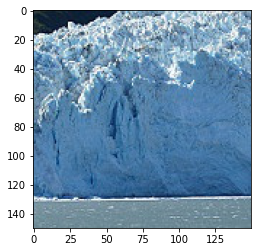

In [249]:
plt.imshow(pred_array)

In [250]:
pred_array=pred_array/255.0

In [251]:
pred_array.shape

(150, 150, 3)

In [252]:
x=np.array([pred_array])

In [253]:
prediction=model.predict(x)

In [254]:
result[np.argmax(prediction)]

'glacier'